In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='Malgun gothic')

In [15]:
df_last = pd.read_csv("C:/LHH/study/python/notebook/data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding='cp949')
df_last.shape

(4335, 5)

In [16]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [17]:
df_first = pd.read_csv("C:/LHH/study/python/notebook/data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding='cp949')
df_first.shape

(17, 22)

In [18]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [19]:
# data 요약하기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [23]:
# 결측치 확인

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [25]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [31]:
# data type 변경

# df_last['분양가격(㎡)'].astype(int)
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')

In [33]:
# df_first와 단위 맞추기 위해 평당분양가격 구하기

df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [35]:
df_last.describe()

,연도,월,분양가격,평당분양가격
count,4335.000000,4335.000000,3957.000000,3957.000000
mean,2017.352941,6.764706,3238.128633,10685.824488
std,1.234035,3.518361,1264.309933,4172.222780
min,2015.000000,1.000000,1868.000000,6164.400000
25%,2016.000000,4.000000,2441.000000,8055.300000
50%,2017.000000,7.000000,2874.000000,9484.200000
75%,2018.000000,10.000000,3561.000000,11751.300000
max,2019.000000,12.000000,12728.000000,42002.400000


In [36]:
# 규모구분을 전용면적 컬럼으로 변경

df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [40]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과 ', '-')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '-')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적']

0              전체
1             60㎡
2         60㎡-85㎡
3        85㎡-102㎡
4           102㎡-
          ...    
4330           전체
4331          60㎡
4332      60㎡-85㎡
4333     85㎡-102㎡
4334        102㎡-
Name: 전용면적, Length: 4335, dtype: object

In [43]:
# 필요없는 열 삭제

df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡-85㎡
3,서울,2015,10,5721.0,18879.3,85㎡-102㎡
4,서울,2015,10,5879.0,19400.7,102㎡-
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡-85㎡
4333,제주,2019,12,NaN,NaN,85㎡-102㎡


In [45]:
# groupby로 데이터 집계
# groupby는 series 형태로 나옴
# 지역별 평당분양가격 기초통계량

df_last.groupby(['지역명'])['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [46]:
# 전용면적별 평당분양가격 기초통계량

df_last.groupby(['전용면적'])['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적,,,,,,,,
102㎡-,781.0,11517.705634,4195.737182,7055.4,8655.9,9867.0,13863.3,29663.7
60㎡,791.0,10375.137421,4096.948431,6270.0,7758.3,8959.5,11619.3,27327.3
60㎡-85㎡,841.0,10271.040071,3803.382872,6289.8,7784.7,9494.1,11441.1,28340.4
85㎡-102㎡,703.0,11097.599573,4914.656668,6164.4,8692.2,9655.8,11375.1,42002.4
전체,841.0,10276.086207,3739.000519,6299.7,7788.0,9527.1,11411.4,26730.0


In [49]:
# 지역명, 전용면적별 평당분양가격 기초통계량

df_last.groupby(['지역명','전용면적'])['평당분양가격'].describe()
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round()

전용면적,102㎡-,60㎡,60㎡-85㎡,85㎡-102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [52]:
# 연도, 지역별 평당분양가격 기초통계량

df_last.groupby(['연도','지역명'])['평당분양가격'].describe()

count          mean          std      min       25%      50%  \
연도   지역명                                                                 
2015 강원    15.0   7188.060000   250.536854   6801.3   7157.70   7164.3   
     경기    15.0  11060.940000   801.307294  10160.7  10454.40  10866.9   
     경남    15.0   8459.220000  1172.105264   7260.0   7571.85   7662.6   
     경북    15.0   7464.160000   413.196874   7078.5   7202.25   7273.2   
     광주     9.0   7916.700000   290.409375   7428.3   7903.50   7999.2   
...         ...           ...          ...      ...       ...      ...   
2019 전남    58.0   8219.275862   846.746776   7101.6   7712.10   7906.8   
     전북    60.0   8532.260000   569.705735   7748.4   8106.45   8679.0   
     제주    52.0  11828.469231   928.732935   9741.6  11299.20  11883.3   
     충남    55.0   8748.840000   591.598150   7695.6   8481.00   8675.7   
     충북    60.0   7970.875000   631.082504   7009.2   7555.35   7656.0   

                75%      max  
연도   지역명                      
2015 강원    7268.250   7563.6  
     경기   11459.250  12705.0  
     경남    9758.100  10041.9  
     경북    7718.700   8302.8  
     광주    8065.200   8213.7  
...             ...      ...  
2019 전남    8295.375  10074.9  
     전북    8903.400  10071.6  
     제주   12553.200  12863.4  
     충남    8885.250  10563.3  
     충북    8500.800   9203.7  

[85 rows x 8 columns]

In [55]:
# pivot table로 데이터 집계
# pivot table은 dataframe 형태로 나옴
# 지역별 평당분양가격

pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='describe')

평당분양가격                                                              \
           25%       50%        75%  count      max          mean      min   
지역명                                                                          
강원    7165.950   7581.75   8281.350  242.0  11873.4   7890.750000   6639.6   
경기   11729.025  13168.65  14600.025  250.0  18711.0  13356.895200  10160.7   
경남    8233.500   9187.20   9698.700  247.0  14199.9   9268.778138   7260.0   
경북    7728.600   8335.80   8824.200  241.0  11408.1   8376.536515   6949.8   
광주    9068.400   9527.10  10800.900  201.0  16107.3   9951.535821   7428.3   
대구   10399.950  11904.75  13330.350  242.0  17021.4  11980.895455   8259.9   
대전    8580.000   9401.70  11615.175  198.0  16094.1  10253.333333   8002.5   
부산   10709.325  12338.70  12972.300  250.0  15255.9  12087.121200   9669.0   
서울   21318.825  22497.75  25072.575  250.0  42002.4  23599.976400  16701.3   
세종    8906.700   9197.10  10388.400  237.0  12972.3   9796.516456   8487.6   
울산    9484.200  10127.70  10474.200  149.0  11860.2  10014.902013   7992.6   
인천   10808.325  11378.40  12480.600  246.0  17120.4  11915.320732   9537.0   
전남    7098.300   7585.05   7923.300  248.0  10074.9   7565.316532   6289.8   
전북    7248.450   7659.30   8241.750  248.0  10071.6   7724.235484   6270.0   
제주    9929.700  10787.70  12553.200  219.0  18024.6  11241.276712   7342.5   
충남    7585.050   8134.50   8768.100  239.0  10563.3   8233.651883   6926.7   
충북    6969.600   7543.80   8250.000  250.0   9421.5   7634.655600   6164.4   

                  
             std  
지역명               
강원   1044.359840  
경기   1969.310711  
경남   1356.695327  
경북    850.823275  
광주   1506.593261  
대구   2018.395637  
대전   2245.370020  
부산   1447.322754  
서울   3969.953218  
세종   1096.551246  
울산    899.543667  
인천   1642.963530  
전남    773.929820  
전북    868.364876  
제주   2351.630010  
충남    741.954128  
충북    796.759331

In [56]:
# 전용면적별 평당분양가격

pd.pivot_table(df_last, index=['전용면적'], values=['평당분양가격'], aggfunc='describe')

평당분양가격                                                         \
              25%     50%      75%  count      max          mean     min   
전용면적                                                                       
 102㎡-     8655.9  9867.0  13863.3  781.0  29663.7  11517.705634  7055.4   
 60㎡       7758.3  8959.5  11619.3  791.0  27327.3  10375.137421  6270.0   
 60㎡-85㎡   7784.7  9494.1  11441.1  841.0  28340.4  10271.040071  6289.8   
 85㎡-102㎡  8692.2  9655.8  11375.1  703.0  42002.4  11097.599573  6164.4   
전체         7788.0  9527.1  11411.4  841.0  26730.0  10276.086207  6299.7   

                        
                   std  
전용면적                    
 102㎡-     4195.737182  
 60㎡       4096.948431  
 60㎡-85㎡   3803.382872  
 85㎡-102㎡  4914.656668  
전체         3739.000519

In [58]:
# 지역별, 전용면적별 평당분양가격

pd.pivot_table(df_last, index=['지역명', '전용면적'], values=['평당분양가격'], aggfunc='describe')

평당분양가격                                                 \
                    25%      50%       75% count      max         mean   
지역명 전용면적                                                                 
강원   102㎡-     7571.850  7906.80  8794.500  50.0  11873.4  8311.380000   
     60㎡       6997.650  7487.70  8091.600  50.0   8494.2  7567.098000   
     60㎡-85㎡   7060.350  7494.30  7772.325  50.0   8322.6  7485.588000   
     85㎡-102㎡  7329.300  9339.00  9972.600  42.0  10985.7  8749.557143   
    전체         7037.250  7517.40  7784.700  50.0   8362.2  7477.536000   
...                 ...      ...       ...   ...      ...          ...   
충북   102㎡-     7560.300  8250.00  8838.225  50.0   9150.9  8195.352000   
     60㎡       6785.625  7121.40  7523.175  50.0   7748.4  7103.118000   
     60㎡-85㎡   6758.400  7099.95  7641.150  50.0   8698.8  7264.488000   
     85㎡-102㎡  7547.925  8500.80  8992.500  50.0   9421.5  8391.306000   
    전체         6747.675  7010.85  7604.850  50.0   8698.8  7219.014000   

                                    
                  min          std  
지역명 전용면적                            
강원   102㎡-     7164.3  1115.691068  
     60㎡       6656.1   587.618803  
     60㎡-85㎡   6831.0   452.293770  
     85㎡-102㎡  6639.6  1572.342369  
    전체         6824.4   489.686017  
...               ...          ...  
충북   102㎡-     7329.3   582.406513  
     60㎡       6319.5   436.441132  
     60㎡-85㎡   6543.9   554.984472  
     85㎡-102㎡  6164.4   743.206116  
    전체         6494.4   571.406859  

[85 rows x 8 columns]

In [61]:
# 연도별 지역별 평당분양가격

pd.pivot_table(df_last, index=['연도', '지역명'], values=['평당분양가격'], aggfunc='describe')

평당분양가격                                                            \
               25%      50%        75% count      max          mean      min   
연도   지역명                                                                       
2015 강원    7157.70   7164.3   7268.250  15.0   7563.6   7188.060000   6801.3   
     경기   10454.40  10866.9  11459.250  15.0  12705.0  11060.940000  10160.7   
     경남    7571.85   7662.6   9758.100  15.0  10041.9   8459.220000   7260.0   
     경북    7202.25   7273.2   7718.700  15.0   8302.8   7464.160000   7078.5   
     광주    7903.50   7999.2   8065.200   9.0   8213.7   7916.700000   7428.3   
...            ...      ...        ...   ...      ...           ...      ...   
2019 전남    7712.10   7906.8   8295.375  58.0  10074.9   8219.275862   7101.6   
     전북    8106.45   8679.0   8903.400  60.0  10071.6   8532.260000   7748.4   
     제주   11299.20  11883.3  12553.200  52.0  12863.4  11828.469231   9741.6   
     충남    8481.00   8675.7   8885.250  55.0  10563.3   8748.840000   7695.6   
     충북    7555.35   7656.0   8500.800  60.0   9203.7   7970.875000   7009.2   

                       
                  std  
연도   지역명               
2015 강원    250.536854  
     경기    801.307294  
     경남   1172.105264  
     경북    413.196874  
     광주    290.409375  
...               ...  
2019 전남    846.746776  
     전북    569.705735  
     제주    928.732935  
     충남    591.598150  
     충북    631.082504  

[85 rows x 8 columns]

# df_last 시각화

In [78]:
# 지역별 평당분양가격 평균 시각화

g = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g

지역명
서울    23599.976400
경기    13356.895200
부산    12087.121200
대구    11980.895455
인천    11915.320732
제주    11241.276712
대전    10253.333333
울산    10014.902013
광주     9951.535821
세종     9796.516456
경남     9268.778138
경북     8376.536515
충남     8233.651883
강원     7890.750000
전북     7724.235484
충북     7634.655600
전남     7565.316532
Name: 평당분양가격, dtype: float64

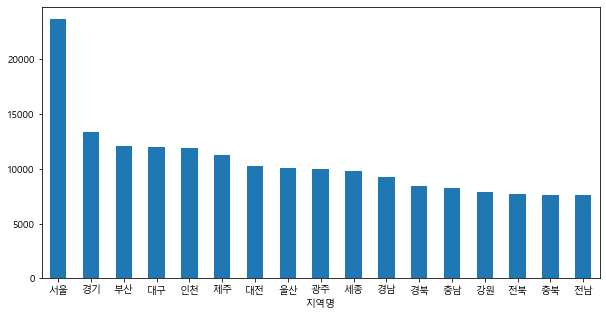

In [82]:
g.plot.bar(rot = 0, figsize = (10,5))

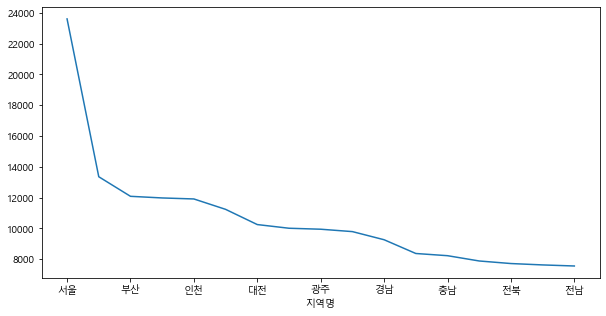

In [81]:
g.plot(rot = 0, figsize = (10,5))

In [90]:
# 전용면적별 분양가격 평균 시각화

g = df_last.groupby(['전용면적'])['평당분양가격'].mean().sort_values()
g

전용면적
 60㎡-85㎡     10271.040071
전체           10276.086207
 60㎡         10375.137421
 85㎡-102㎡    11097.599573
 102㎡-       11517.705634
Name: 평당분양가격, dtype: float64

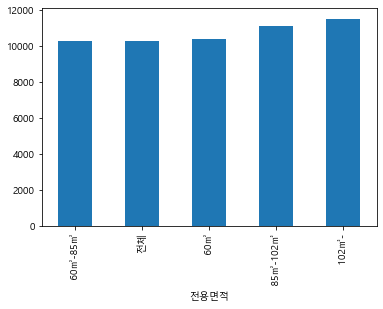

In [91]:
g.plot.bar()

In [88]:
# 연도별 평균분양가격 평균 시각화

g = df_last.groupby(['연도'])['평당분양가격'].mean().sort_values()
g

연도
2015     9202.735802
2016     9683.025000
2017    10360.487653
2018    10978.938411
2019    12188.293092
Name: 평당분양가격, dtype: float64

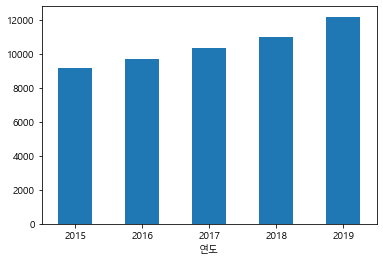

In [89]:
g.plot.bar(rot = 0)

## box plot

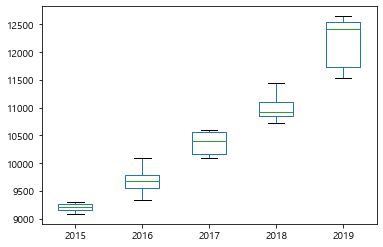

In [93]:
df_last.pivot_table(index='월', columns='연도', values='평당분양가격').plot.box()

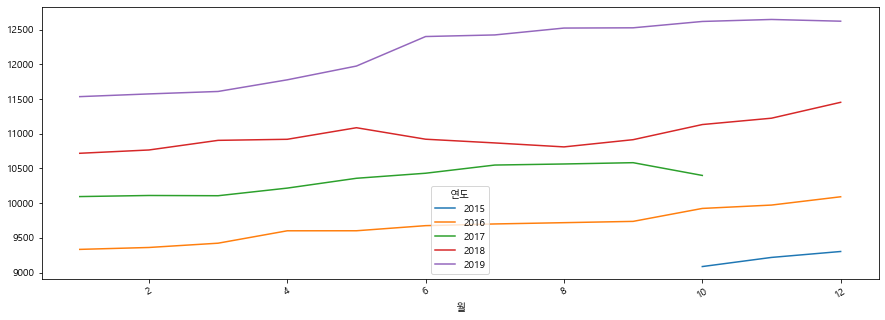

In [98]:
p = df_last.pivot_table(index='월', columns=['연도'], values='평당분양가격')
p.plot(figsize = (15,5), rot=30)

## seaborn으로 시각화

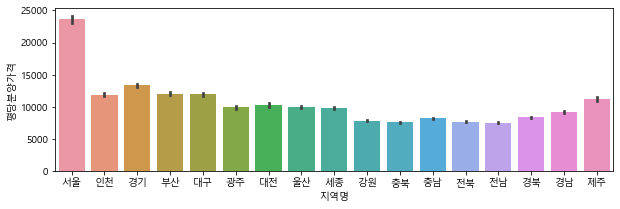

In [108]:
# 지역별 평당분양가격

plt.figure(figsize = (10,3))
sns.barplot(data=df_last, x='지역명', y='평당분양가격')

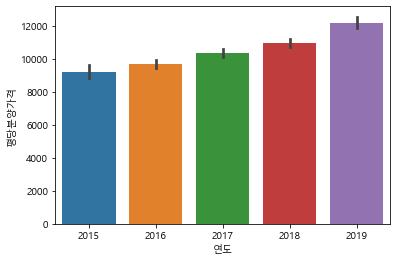

In [109]:
# d연도별 평당분양가격

sns.barplot(data=df_last, x='연도', y='평당분양가격')

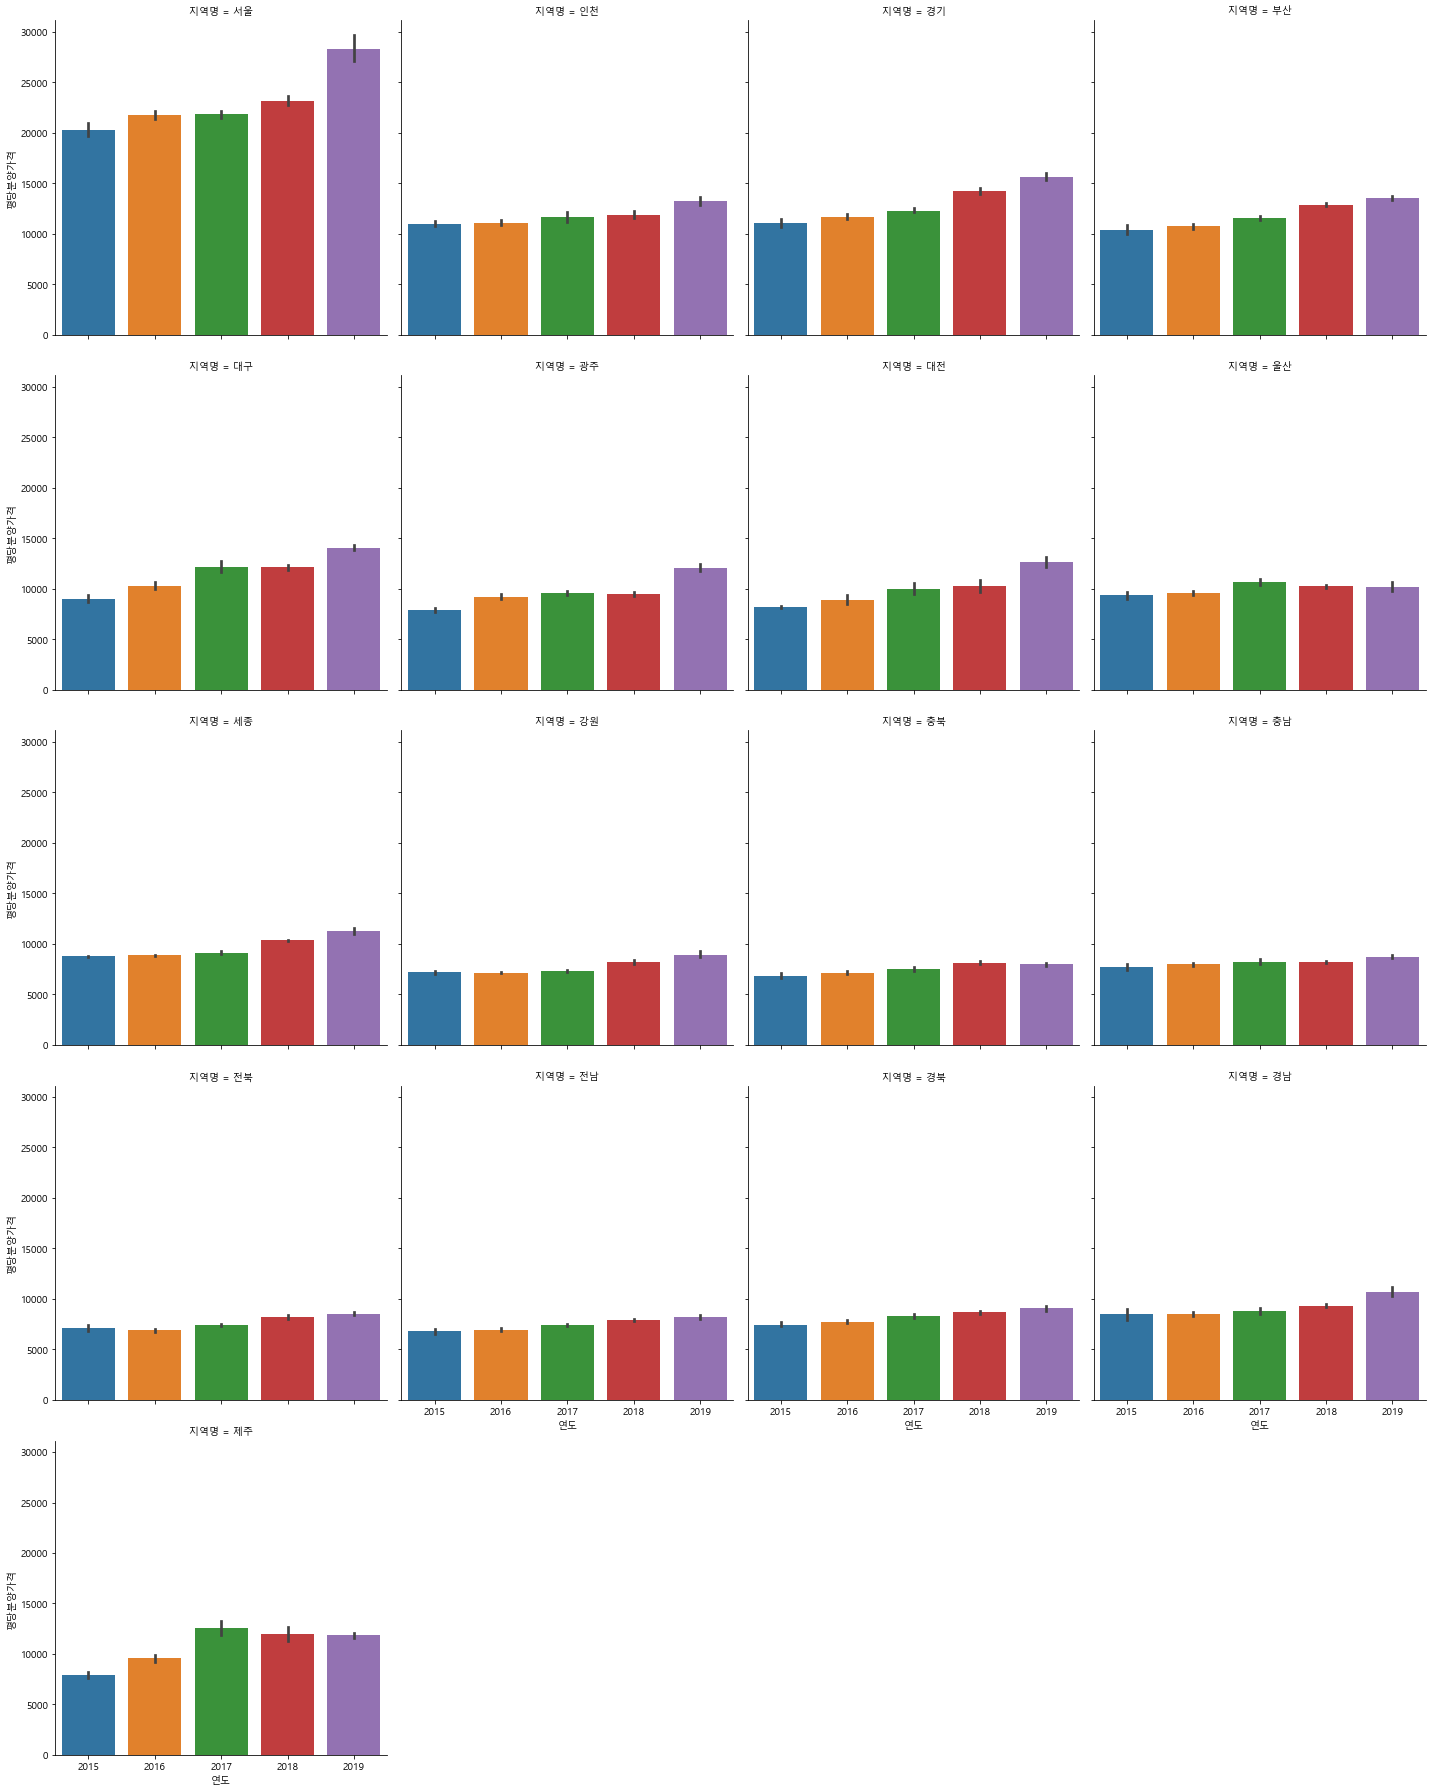

In [124]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4)

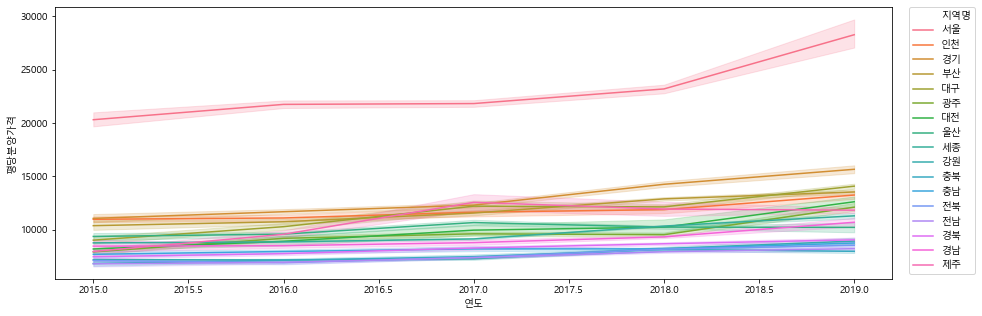

In [116]:
# hue 옵션을 통해 지역별로 시각화

plt.figure(figsize = (15,5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

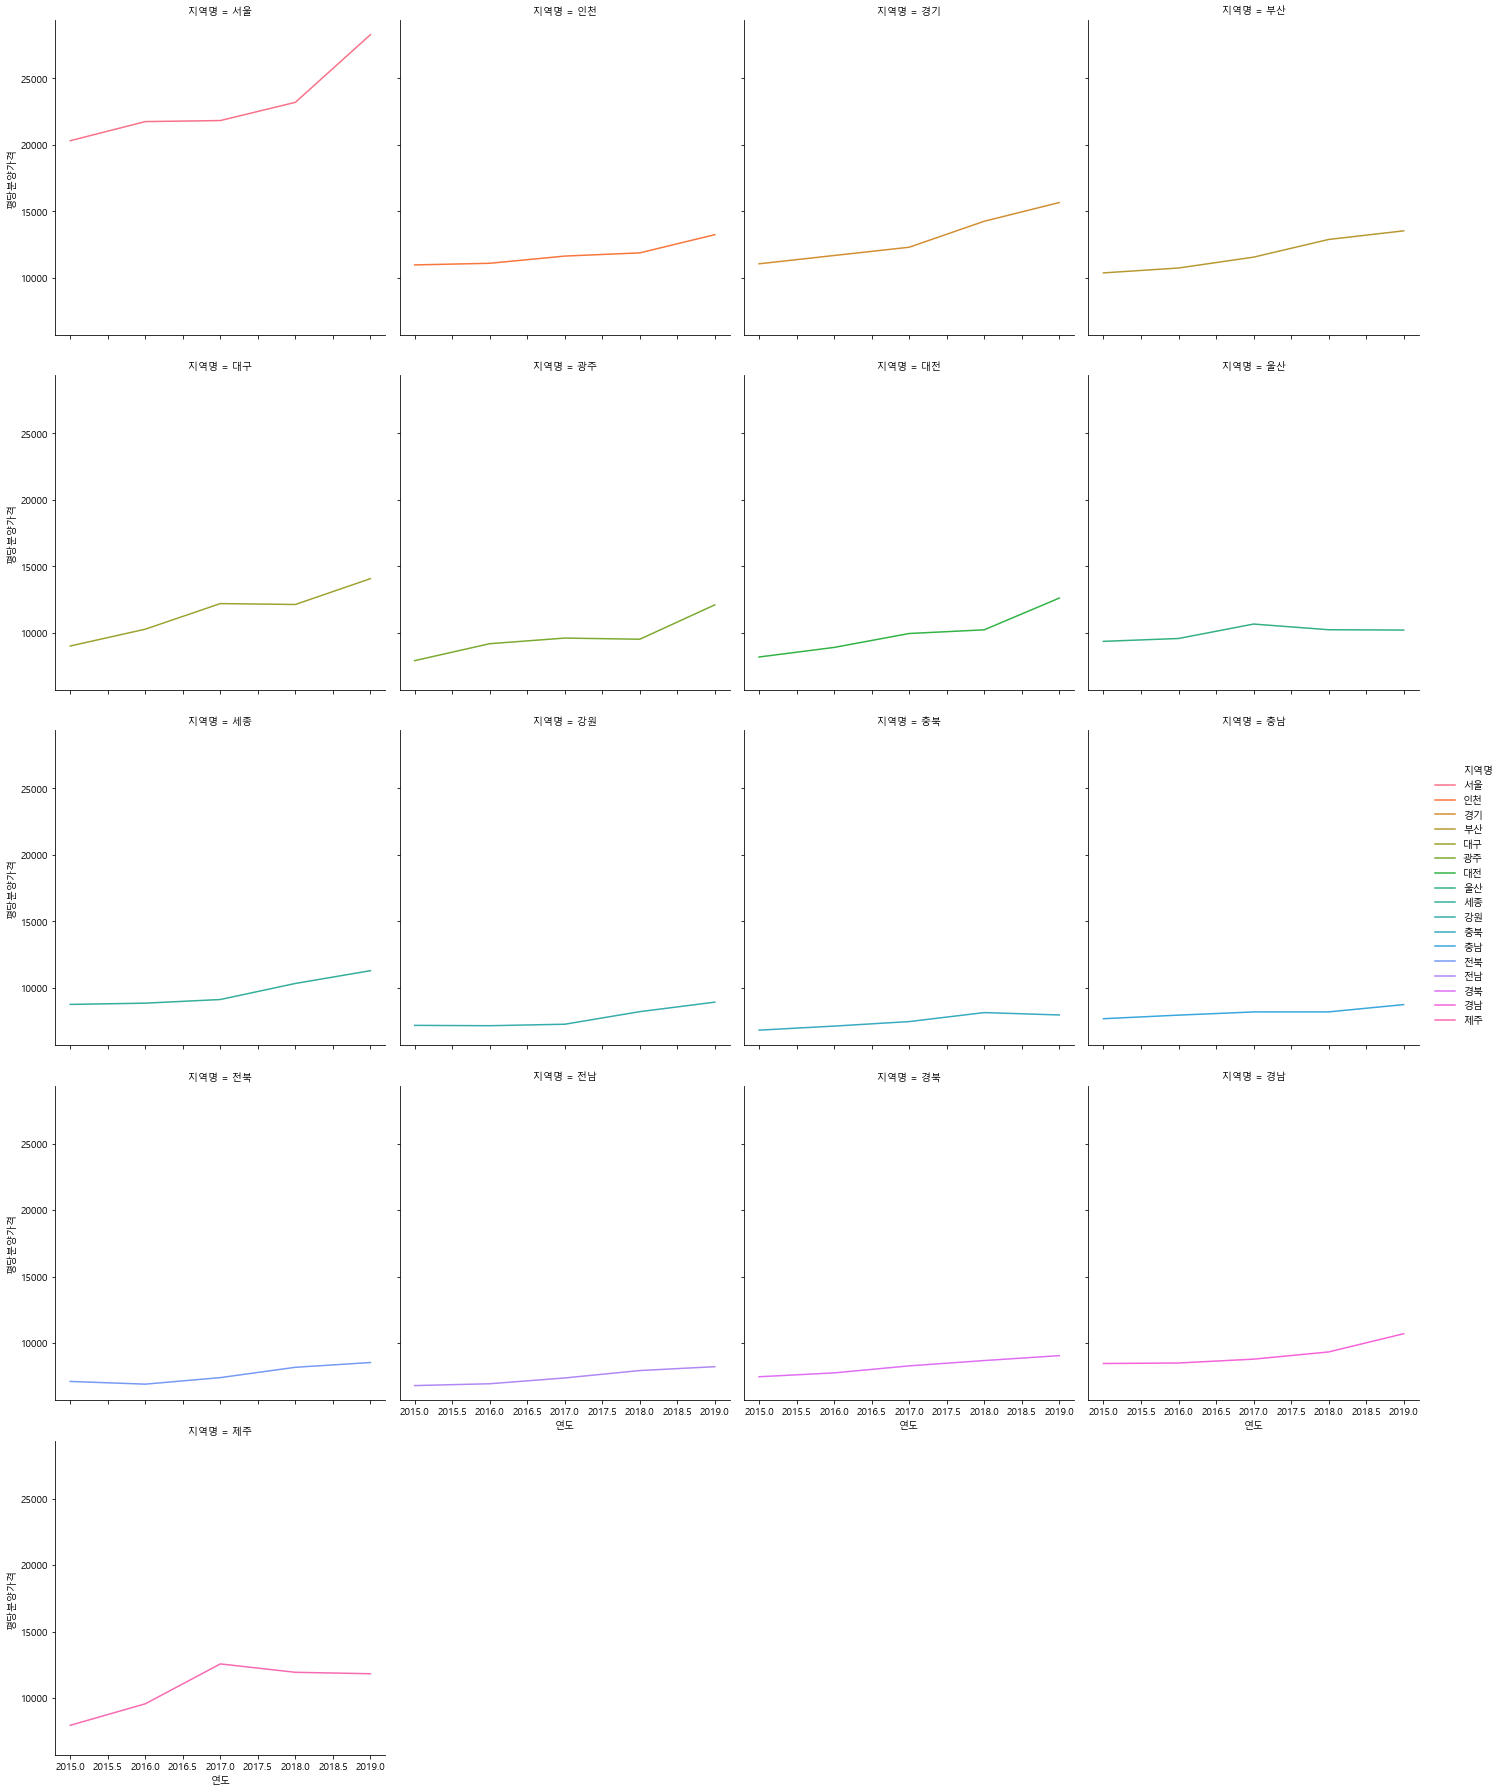

In [121]:
sns.relplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', kind='line',
           col='지역명', col_wrap=4, ci=None)

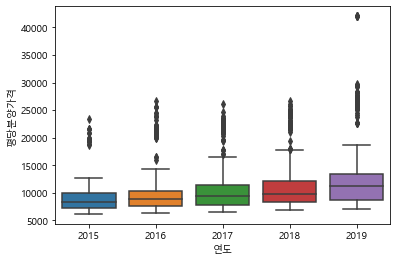

In [126]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

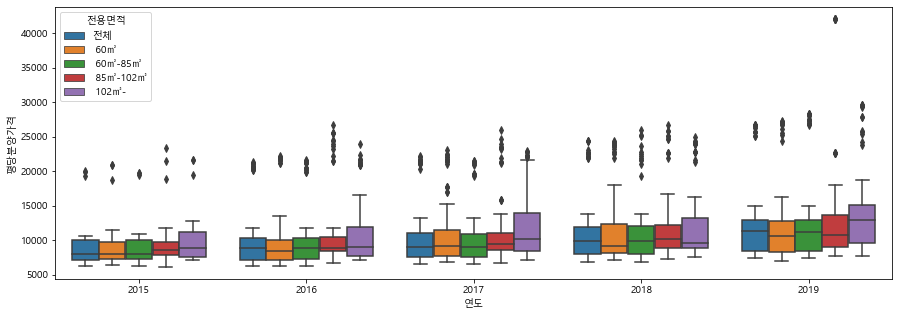

In [128]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')

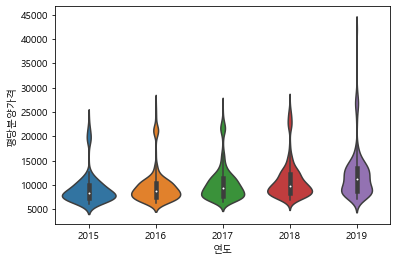

In [130]:
# violineplot은 rawdata의 밀도를 눈으로 확인하기 쉽다

sns.violinplot(data=df_last, x='연도', y='평당분양가격')

## lmplot, swarmplot

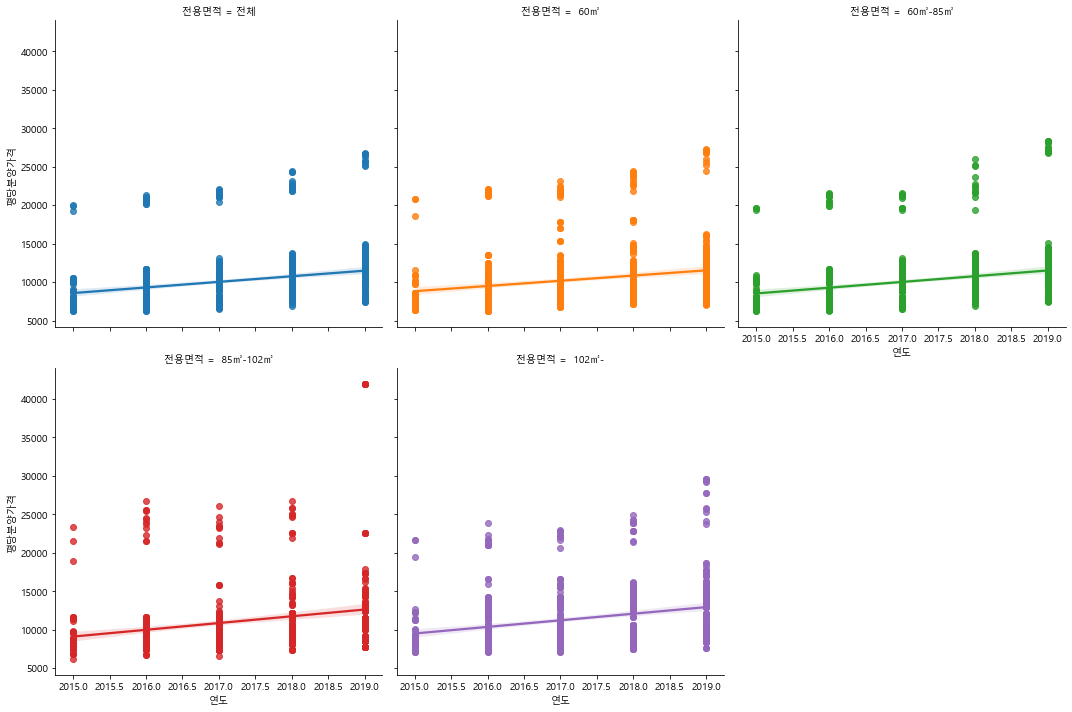

In [134]:
# 연도별 평당분양가격을 lmplot으로

sns.lmplot(data=df_last, x='연도',  y='평당분양가격', hue='전용면적', col='전용면적', col_wrap=3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


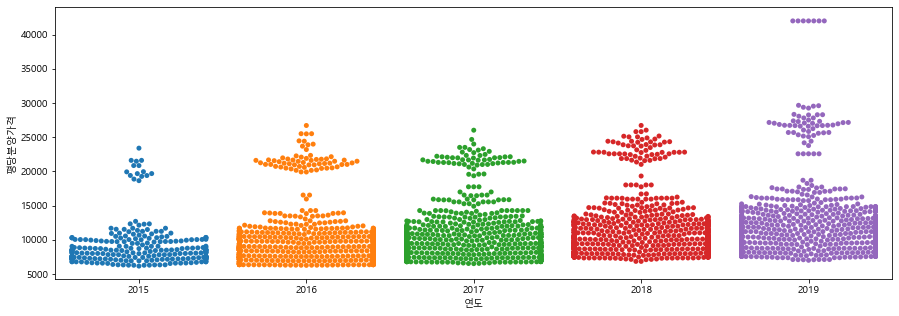

In [135]:
# swarmplot으로
# data 너무 많으면 부적절(시간이 너무 오래 걸림)

plt.figure(figsize = (15,5))
sns.swarmplot(data=df_last, x='연도', y='평당분양가격')

### 이상치 확인

In [136]:
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [137]:
max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [138]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡-102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡-102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡-102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡-102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡-102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡-102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡-102㎡


## histogram

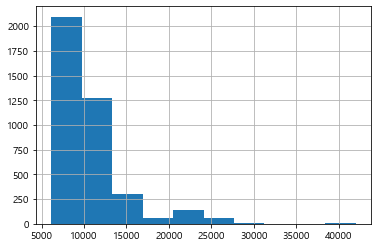

In [142]:
h = df_last['평당분양가격'].hist()

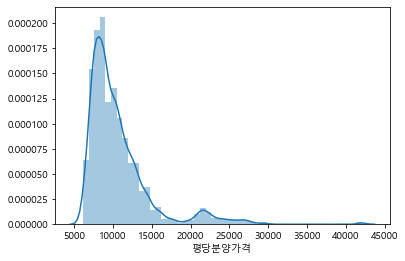

In [147]:
price = df_last['평당분양가격']
sns.distplot(price)

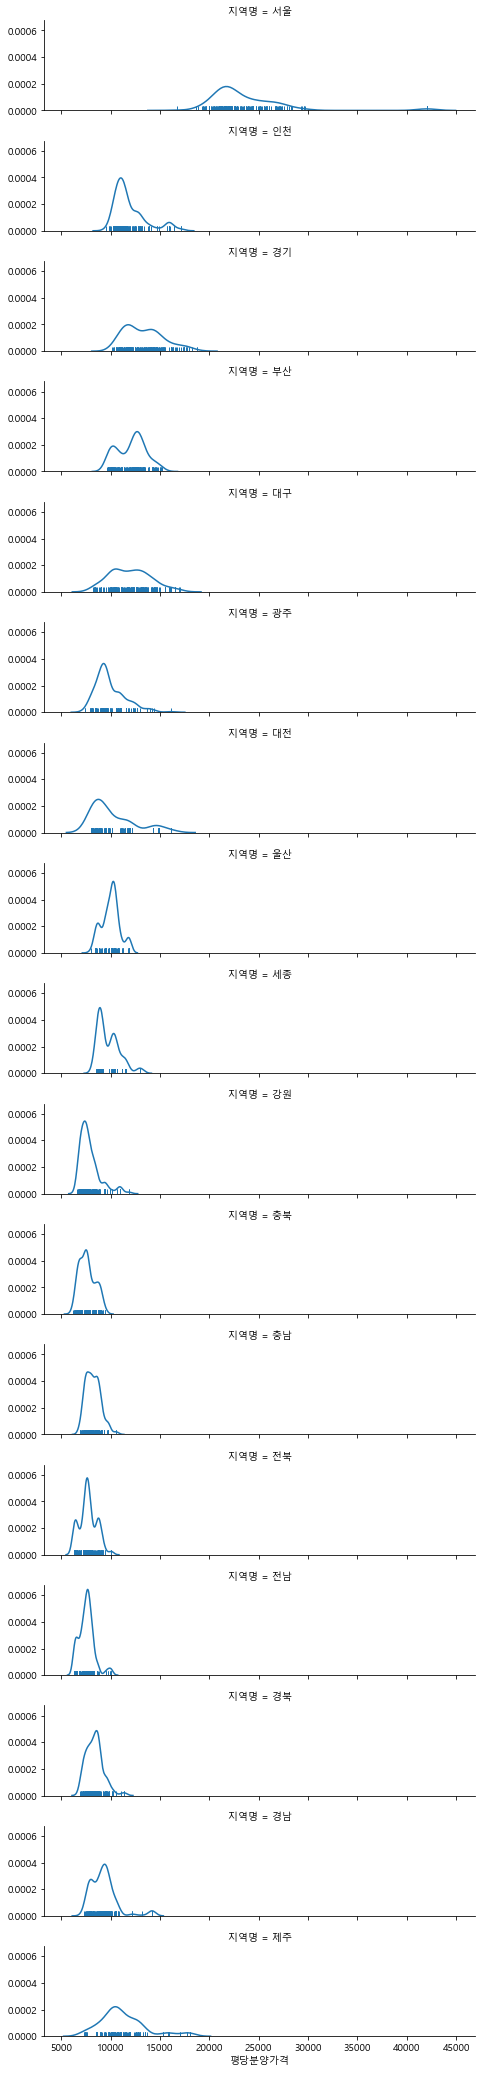

In [148]:
g = sns.FacetGrid(df_last, row='지역명',
                 height=1.7, aspect=4,)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

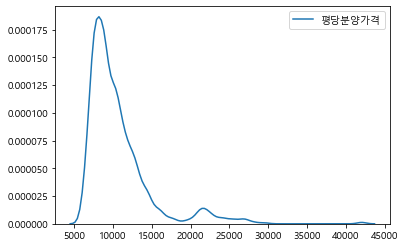

In [155]:
# sns.distplot(price, hist=False, rug=True)
sns.kdeplot(price)

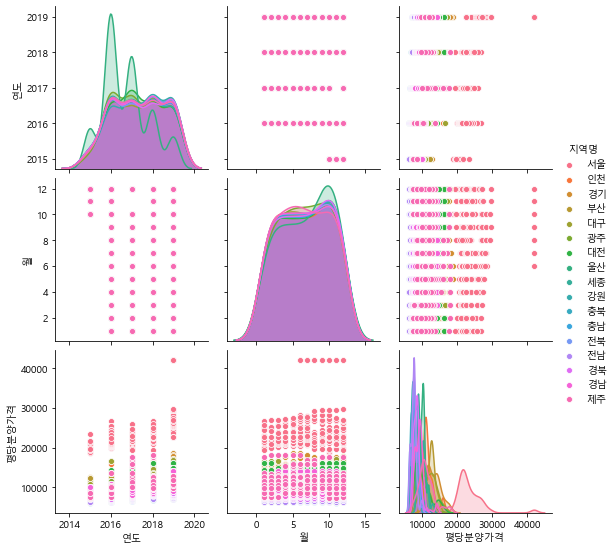

In [164]:
# pairplot
df_last_notnull = df_last.loc[df_last['평당분양가격'].notnull(),
                             ['연도','월','평당분양가격','지역명','전용면적']]
sns.pairplot(df_last_notnull, hue='지역명')

In [167]:
pd.options.display.max_columns = 25

In [168]:
df_first.shape

(17, 22)

In [169]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [173]:
# 전처리를 위한 melt

df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [174]:
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [175]:
# 기간을 연도, 월로 나누기

date = "2013년12월"
date

'2013년12월'

In [177]:
date.split('년')[0]

'2013'

In [179]:
date.split('년')[1].replace('월', '')

'12'

In [180]:
# 연도 추출 함수

def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

y = parse_year(date)
y

2013

In [182]:
# 월 추출 함수

def parse_month(date):
    month = date.split('년')[1].replace('월', '')
    month = int(month)
    return month

m = parse_month(date)
m

12

In [183]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [184]:
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [186]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [187]:
cols = ['지역명', '연도', '월','평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [188]:
# first, last 합치기
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()
df_last_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [189]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [193]:
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [195]:
df['연도'].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [200]:
# 숫자가 많아 한 눈에 들어오지 않음

t = pd.pivot_table(data = df, index = '연도', columns = '지역명', values='평당분양가격').round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


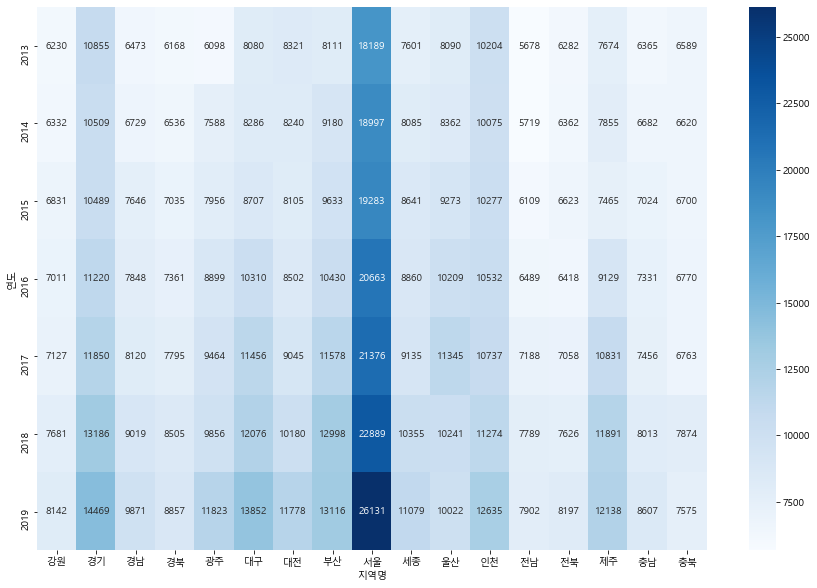

In [206]:
# heatmap으로 표현해보기

plt.figure(figsize = (15,10))
sns.heatmap(t, cmap='Blues', annot = True, fmt='.0f')

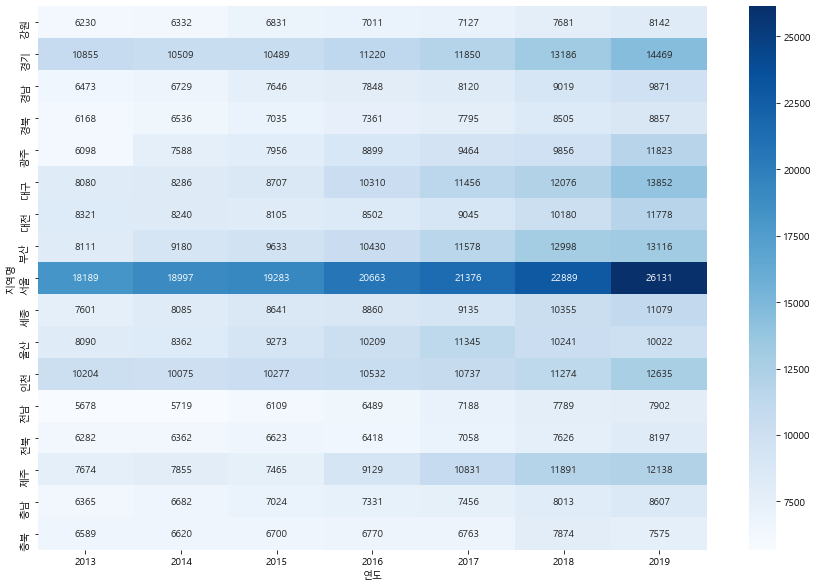

In [207]:
plt.figure(figsize = (15,10))
sns.heatmap(t.T, cmap='Blues', annot = True, fmt='.0f')

In [215]:
# groupby로도 같은 형태로 그릴 수 있다

g = df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


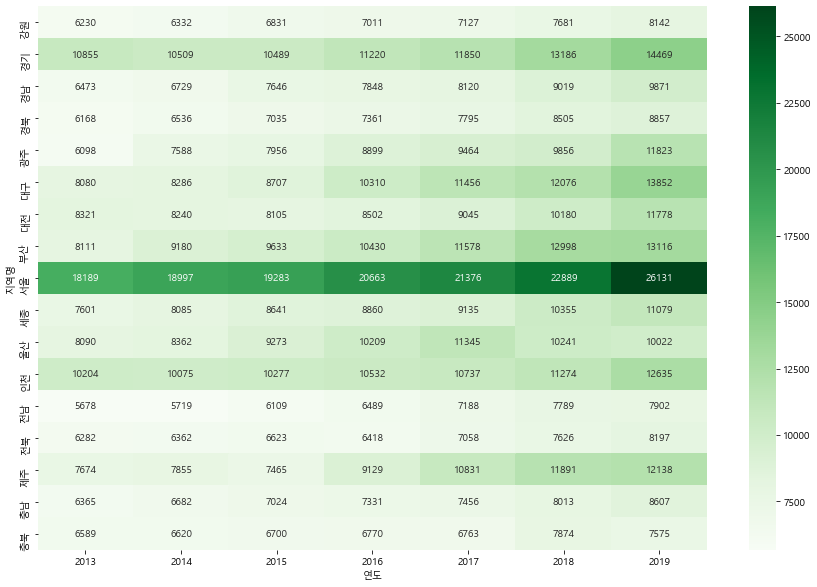

In [217]:
plt.figure(figsize = (15,10))
sns.heatmap(g.T, cmap='Greens', annot = True, fmt='.0f')

## 2013년부터 2019년까지 시각화하기

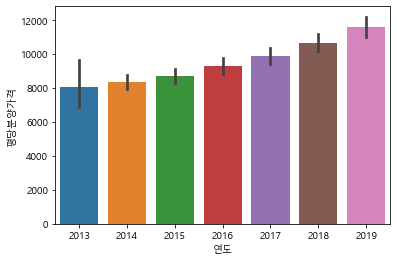

In [218]:
sns.barplot(data = df, x='연도', y='평당분양가격')

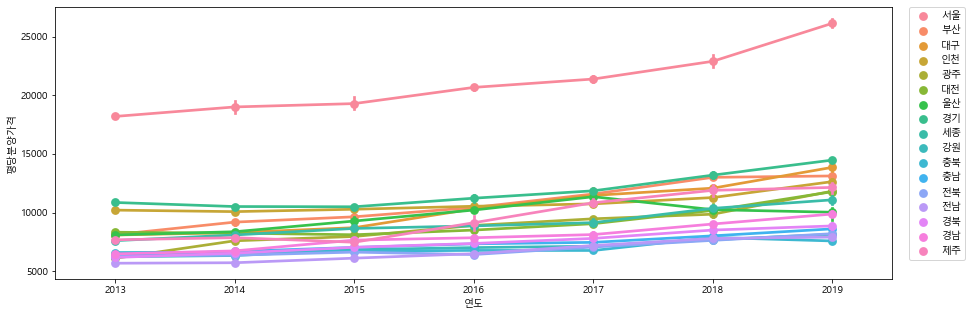

In [223]:
plt.figure(figsize = (15,5))
sns.pointplot(data=df, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

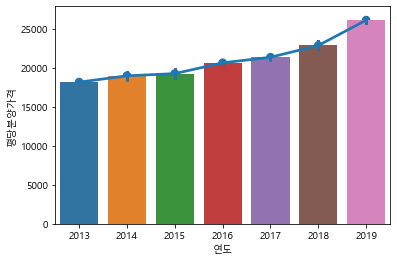

In [230]:
df_seoul = df[df['지역명']=='서울'].copy()
sns.barplot(data = df_seoul, x='연도', y='평당분양가격')
sns.pointplot(data = df_seoul, x='연도', y='평당분양가격')

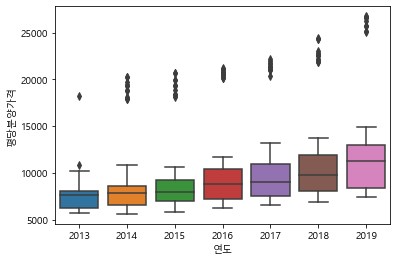

In [231]:
sns.boxplot(data=df, x='연도', y='평당분양가격')

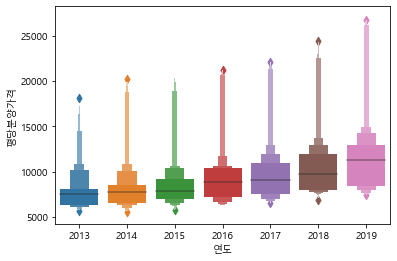

In [233]:
sns.boxenplot(data=df, x='연도', y='평당분양가격')

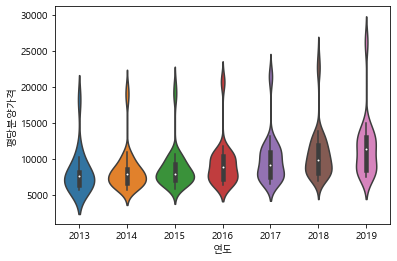

In [232]:
sns.violinplot(data=df, x='연도', y='평당분양가격')

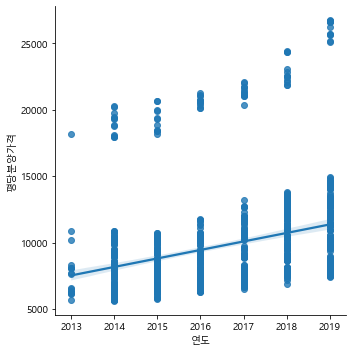

In [234]:
sns.lmplot(data=df, x='연도', y='평당분양가격')

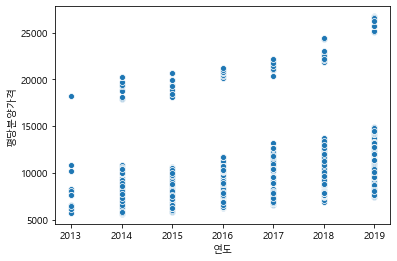

In [235]:
sns.scatterplot(data=df, x='연도', y='평당분양가격')

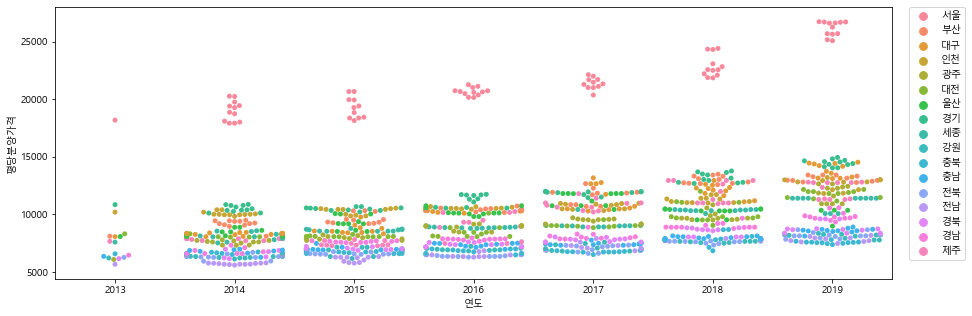

In [239]:
plt.figure(figsize = (15,5))
sns.swarmplot(data=df, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

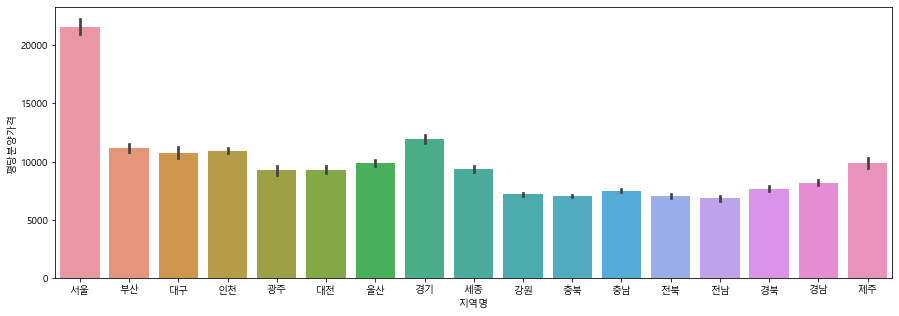

In [242]:
plt.figure(figsize = (15,5))
sns.barplot(data=df, x='지역명', y='평당분양가격')

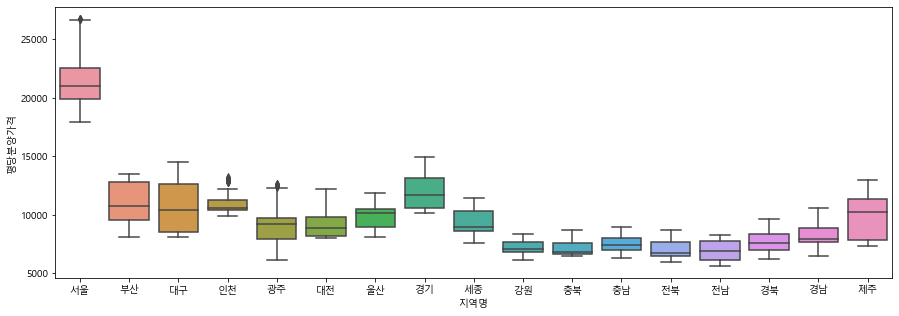

In [243]:
plt.figure(figsize = (15,5))
sns.boxplot(data=df, x='지역명', y='평당분양가격')

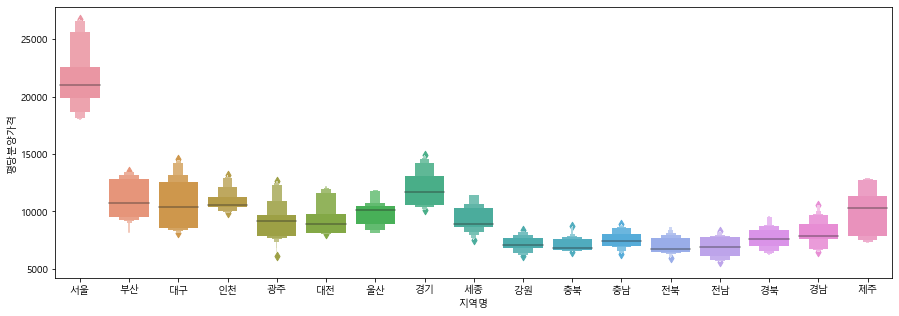

In [244]:
plt.figure(figsize = (15,5))
sns.boxenplot(data=df, x='지역명', y='평당분양가격')

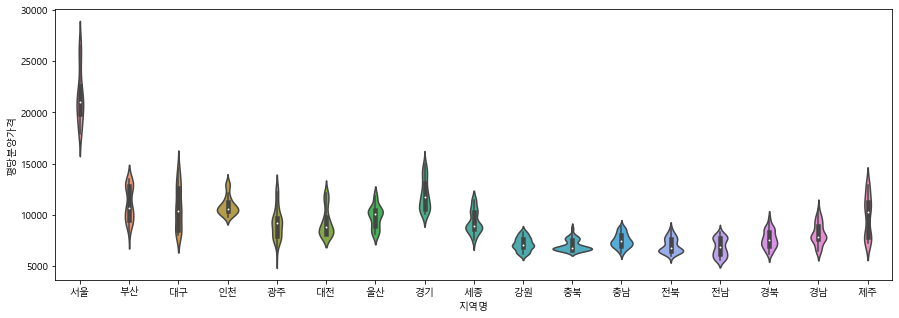

In [245]:
plt.figure(figsize = (15,5))
sns.violinplot(data=df, x='지역명', y='평당분양가격')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


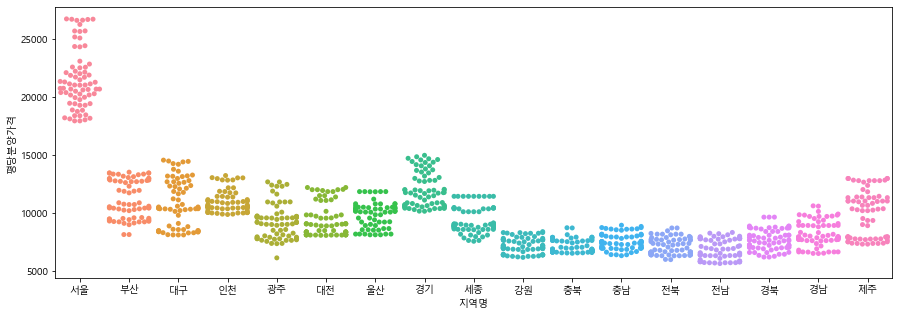

In [246]:
plt.figure(figsize = (15,5))
sns.swarmplot(data=df, x='지역명', y='평당분양가격')